In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Carga y transformación de datos - Noviembre 2023
Se va a cargar el archivo `consolidado-de-salidas-sistema-troncal-por-franja-horaria-noviembre-2023.csv` desde la carpeta `week_02`.
Se preparará un dataframe **long** con columnas: Fecha, Día de la semana, Tipo de día, TotalUsuarios.


In [14]:
import pandas as pd
import numpy as np

file_path_2023 = '/content/drive/MyDrive/CTVII;BASE DE DATOS Y ANALITICA R03-20250815T232505Z-1-001/CTVII_BASE DE DATOS Y ANALITICA R03/week_03-20250822T231508Z-1-001/week_03/consolidado-de-salidas-sistema-troncal-por-franja-horaria-noviembre-2024.csv'
df_2023 = pd.read_csv(file_path_2023, sep=';', encoding='latin-1')

id_vars_2023 = ['Línea','Estación','Acceso de Estación','MES','INTERVALO','Total general','Unnamed: 37','Unnamed: 38']
daily_cols_2023 = [c for c in df_2023.columns if c.startswith('DÍA ')]

df_2023_long = df_2023.melt(id_vars=id_vars_2023, value_vars=daily_cols_2023, var_name='DiaStr', value_name='TotalUsuarios')
df_2023_long['DiaMes'] = df_2023_long['DiaStr'].str.replace('DÍA ','').astype(int)
df_2023_long['TotalUsuarios'] = pd.to_numeric(df_2023_long['TotalUsuarios'], errors='coerce').fillna(0)
df_2023_long['Fecha'] = pd.to_datetime('2023-11-' + df_2023_long['DiaMes'].astype(str), errors='coerce')
df_2023_long.dropna(subset=['Fecha'], inplace=True)
df_2023_long['DiaSemana'] = df_2023_long['Fecha'].dt.day_name()
df_2023_long['TipoDia'] = df_2023_long['DiaSemana'].apply(lambda x: 'Fin de Semana' if x in ['Saturday','Sunday'] else 'Día Laboral')

weekday_map = {'Monday':'Lunes','Tuesday':'Martes','Wednesday':'Miércoles','Thursday':'Jueves','Friday':'Viernes','Saturday':'Sábado','Sunday':'Domingo'}
df_2023_long['DiaSemana'] = df_2023_long['DiaSemana'].map(weekday_map)

df_2023_long.head()


/tmp/ipython-input-1739334996.py:5: DtypeWarning: Columns (0,1,2,3,4,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(file_path_2023, sep=';', encoding='latin-1')


,Línea,Estación,Acceso de Estación,MES,INTERVALO,Total general,Unnamed: 37,Unnamed: 38,DiaStr,TotalUsuarios,DiaMes,Fecha,DiaSemana,TipoDia
0,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,00:00,0.0,NaN,NaN,DÍA 01,0.0,1,2023-11-01,Miércoles,Día Laboral
1,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,00:15,0.0,NaN,NaN,DÍA 01,0.0,1,2023-11-01,Miércoles,Día Laboral
2,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,00:30,0.0,NaN,NaN,DÍA 01,0.0,1,2023-11-01,Miércoles,Día Laboral
3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,00:45,0.0,NaN,NaN,DÍA 01,0.0,1,2023-11-01,Miércoles,Día Laboral
4,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,01:00,0.0,NaN,NaN,DÍA 01,0.0,1,2023-11-01,Miércoles,Día Laboral


# Carga y transformación de datos - Noviembre 2024
Se cargará el archivo `consolidado-de-salidas-sistema-troncal-por-franja-horaria-noviembre-2024.csv` desde la carpeta `week_03`.
Se prepara un dataframe long con las mismas columnas que 2023.


In [16]:
file_path_2024 = '/content/drive/MyDrive/CTVII;BASE DE DATOS Y ANALITICA R03-20250815T232505Z-1-001/CTVII_BASE DE DATOS Y ANALITICA R03/week_03-20250822T231508Z-1-001/week_03/consolidado-de-salidas-sistema-troncal-por-franja-horaria-noviembre-2024.csv'
df_2024 = pd.read_csv(file_path_2024, sep=';', encoding='latin-1')

id_vars_2024 = ['Línea','Estación','Acceso de Estación','MES','INTERVALO','Total general','Unnamed: 37','Unnamed: 38']
daily_cols_2024 = [c for c in df_2024.columns if c.startswith('DÍA ')]

df_2024_long = df_2024.melt(id_vars=id_vars_2024, value_vars=daily_cols_2024, var_name='DiaStr', value_name='TotalUsuarios')
df_2024_long['DiaMes'] = df_2024_long['DiaStr'].str.replace('DÍA ','').astype(int)
df_2024_long['TotalUsuarios'] = pd.to_numeric(df_2024_long['TotalUsuarios'], errors='coerce').fillna(0)
df_2024_long['Fecha'] = pd.to_datetime('2024-11-' + df_2024_long['DiaMes'].astype(str), errors='coerce')
df_2024_long.dropna(subset=['Fecha'], inplace=True)
df_2024_long['DiaSemana'] = df_2024_long['Fecha'].dt.day_name()
df_2024_long['TipoDia'] = df_2024_long['DiaSemana'].apply(lambda x: 'Fin de Semana' if x in ['Saturday','Sunday'] else 'Día Laboral')
df_2024_long['DiaSemana'] = df_2024_long['DiaSemana'].map(weekday_map)

df_2024_long.head()


/tmp/ipython-input-1453647914.py:2: DtypeWarning: Columns (0,1,2,3,4,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv(file_path_2024, sep=';', encoding='latin-1')


,Línea,Estación,Acceso de Estación,MES,INTERVALO,Total general,Unnamed: 37,Unnamed: 38,DiaStr,TotalUsuarios,DiaMes,Fecha,DiaSemana,TipoDia
0,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,00:00,0.0,NaN,NaN,DÍA 01,0.0,1,2024-11-01,Viernes,Día Laboral
1,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,00:15,0.0,NaN,NaN,DÍA 01,0.0,1,2024-11-01,Viernes,Día Laboral
2,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,00:30,0.0,NaN,NaN,DÍA 01,0.0,1,2024-11-01,Viernes,Día Laboral
3,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,00:45,0.0,NaN,NaN,DÍA 01,0.0,1,2024-11-01,Viernes,Día Laboral
4,(11) Zona K Calle 26,(06000) Portal Eldorado,(01) PLAT2 ALIM-DESAL FONTIBÓN/FONTIBÓN CENTRO...,NOVIEMBRE,01:00,0.0,NaN,NaN,DÍA 01,0.0,1,2024-11-01,Viernes,Día Laboral


# Comparación por tipo de día
Calcularemos la suma total de usuarios por tipo de día (laboral vs fin de semana) para 2023 y 2024.


In [20]:
totales_2023 = df_2023_long.groupby('TipoDia')['TotalUsuarios'].sum()
totales_2024 = df_2024_long.groupby('TipoDia')['TotalUsuarios'].sum()

print("Totales Noviembre 2023:\n", totales_2023)
print("\nTotales Noviembre 2024:\n", totales_2024)


Totales Noviembre 2023:
 TipoDia
Día Laboral      4.154942e+07
Fin de Semana    1.501701e+07
Name: TotalUsuarios, dtype: float64

Totales Noviembre 2024:
 TipoDia
Día Laboral      4.423605e+07
Fin de Semana    1.233038e+07
Name: TotalUsuarios, dtype: float64


# Evolución diaria
Graficaremos el número total de usuarios por día del mes para 2023 y 2024.


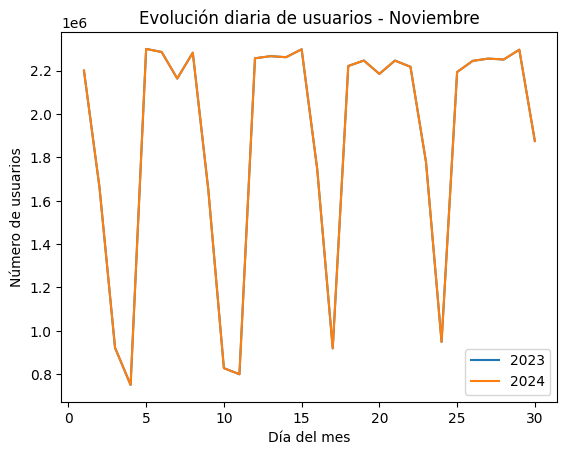

In [18]:
import matplotlib.pyplot as plt

daily_2023 = df_2023_long.groupby('DiaMes')['TotalUsuarios'].sum()
daily_2024 = df_2024_long.groupby('DiaMes')['TotalUsuarios'].sum()

plt.plot(daily_2023.index, daily_2023.values, label='2023')
plt.plot(daily_2024.index, daily_2024.values, label='2024')
plt.title('Evolución diaria de usuarios - Noviembre')
plt.xlabel('Día del mes')
plt.ylabel('Número de usuarios')
plt.legend()
plt.show()


# Estaciones más congestionadas
Analizaremos cuáles estaciones tienen mayor número total de usuarios en 2023 y 2024.


In [21]:
top_estaciones_2023 = df_2023_long.groupby('Estación')['TotalUsuarios'].sum().sort_values(ascending=False).head(10)
top_estaciones_2024 = df_2024_long.groupby('Estación')['TotalUsuarios'].sum().sort_values(ascending=False).head(10)

print("Top 10 estaciones 2023:\n", top_estaciones_2023)
print("\nTop 10 estaciones 2024:\n", top_estaciones_2024)


Top 10 estaciones 2023:
 Estación
(02000) Cabecera Autopista Norte           2100878.438
(05000) Portal Américas                    2047212.193
(07000) Portal Sur JFK Coop. Financiera    1792895.014
(04000) Cabecera Calle 80                  1689901.961
(03000) Portal Suba                        1625065.700
(08000) Portal Tunal                       1486179.952
(06000) Portal Eldorado                    1461717.054
(09000) Cabecera Usme                      1398260.373
(05100) Banderas P. Central                1188572.000
(10000) Portal 20 de Julio                 1154529.819
Name: TotalUsuarios, dtype: float64

Top 10 estaciones 2024:
 Estación
(02000) Cabecera Autopista Norte           2100878.438
(05000) Portal Américas                    2047212.193
(07000) Portal Sur JFK Coop. Financiera    1792895.014
(04000) Cabecera Calle 80                  1689901.961
(03000) Portal Suba                        1625065.700
(08000) Portal Tunal                       1486179.952
(06000) Portal 

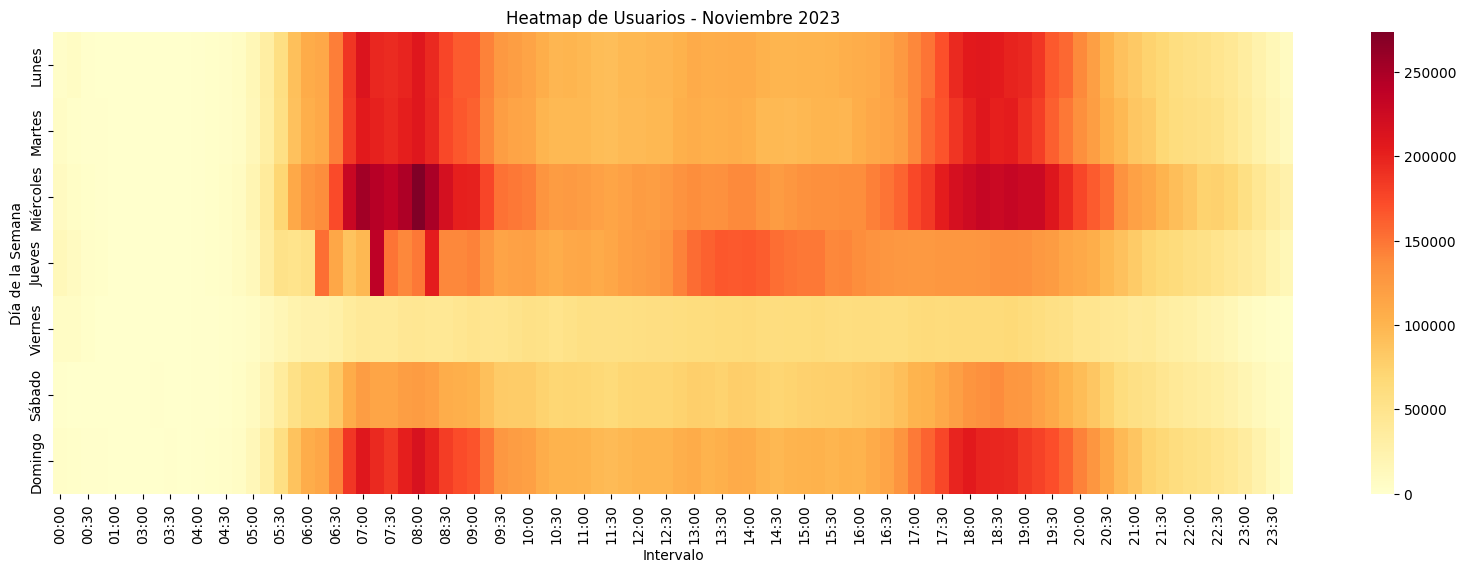

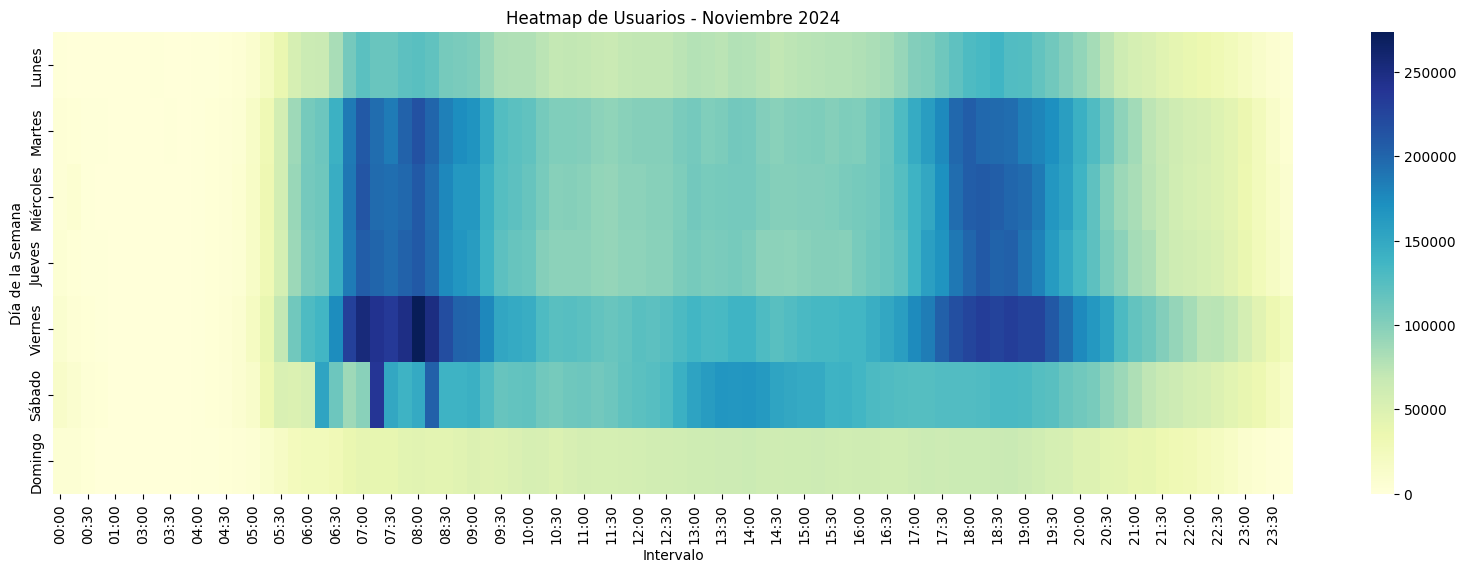

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Definir el orden correcto de los días de la semana ===
dias_orden = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

# === Pivot tables con orden correcto ===
pivot_2023 = df_2023_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)  # reindex para asegurar orden lunes-domingo

pivot_2024 = df_2024_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)

# === Heatmap 2023 ===
plt.figure(figsize=(20,6))
sns.heatmap(pivot_2023, cmap='YlOrRd')
plt.title('Heatmap de Usuarios - Noviembre 2023')
plt.ylabel('Día de la Semana')
plt.xlabel('Intervalo')
plt.show()

# === Heatmap 2024 ===
plt.figure(figsize=(20,6))
sns.heatmap(pivot_2024, cmap='YlGnBu')
plt.title('Heatmap de Usuarios - Noviembre 2024')
plt.ylabel('Día de la Semana')
plt.xlabel('Intervalo')
plt.show()

###Ejercicio:
1. Cree una celda de código que genere un heatmap similar al que se visualiza arriba, pero que contenga la diferencia entre 2024 y 2023.

2. Comente en una celda de texto cómo logró el mapa y qué puede inferir de dicha diferencia.

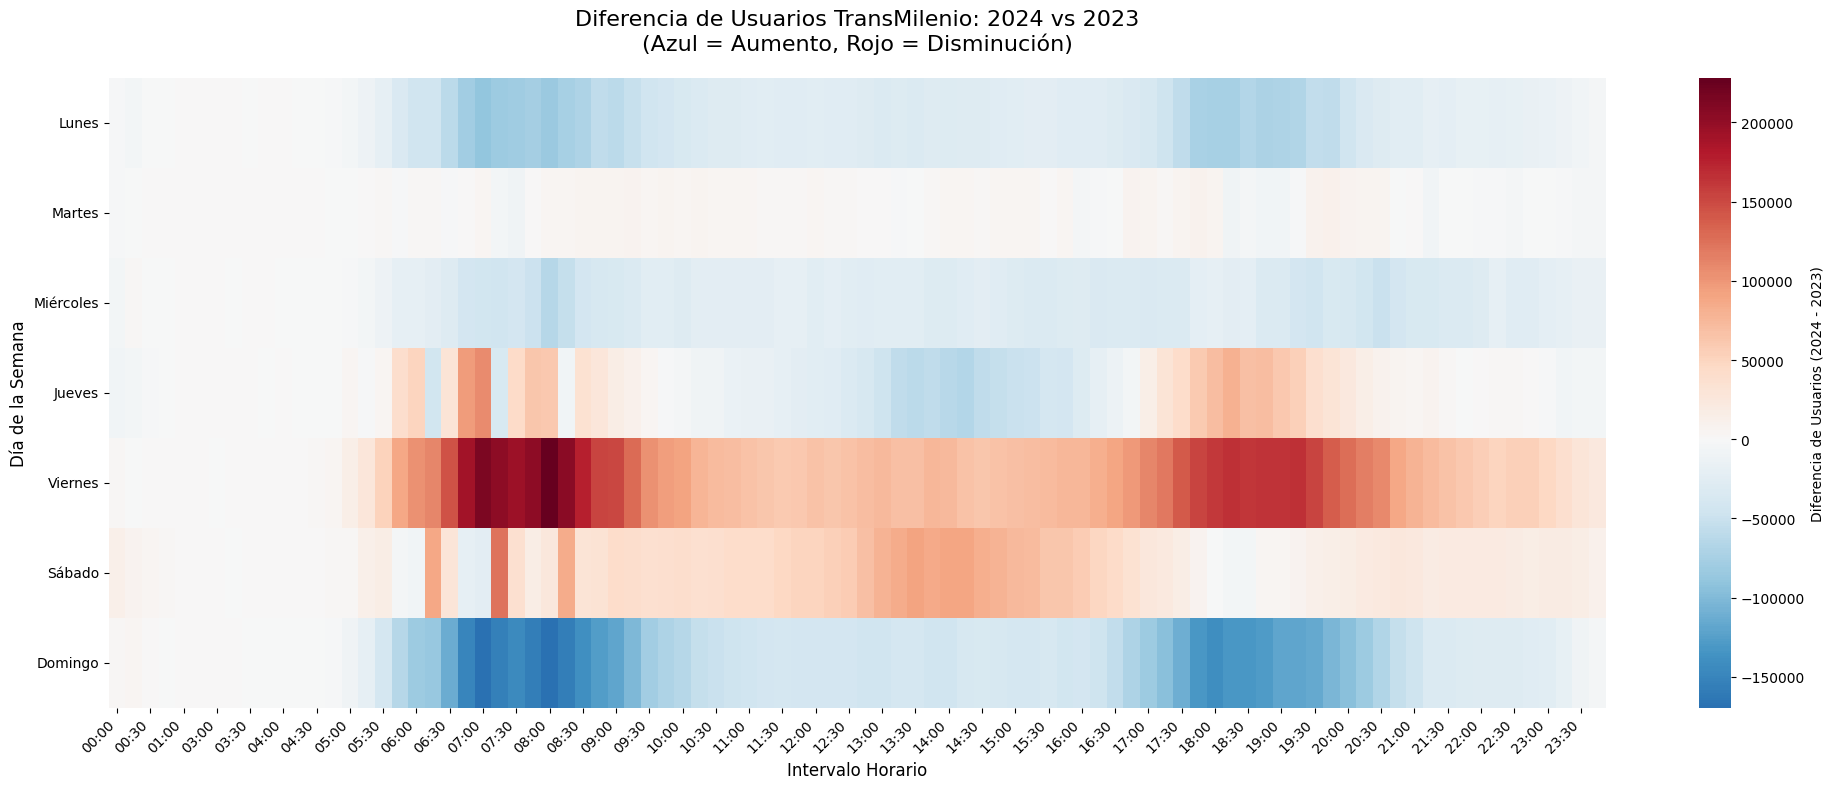

=== ESTADÍSTICAS DE LA DIFERENCIA (2024 - 2023) ===
Diferencia total de usuarios: -0
Diferencia promedio por intervalo: -0.00
Mayor aumento: 228,159 usuarios
Mayor disminución: -169,436 usuarios

=== INTERVALOS CON MAYORES CAMBIOS ===

Top 5 intervalos con mayor AUMENTO:
INTERVALO
00:00    0.0
00:15    0.0
00:30    0.0
00:45    0.0
01:00    0.0
dtype: float64

Top 5 intervalos con mayor DISMINUCIÓN:
INTERVALO
22:45    0.0
23:30    0.0
23:45    0.0
07:45   -0.0
07:15   -0.0
dtype: float64

=== CAMBIOS POR DÍA DE LA SEMANA ===
📉 Lunes: -3,029,082 usuarios
📈 Martes: 125,579 usuarios
📉 Miércoles: -2,303,151 usuarios
📈 Jueves: 212,940 usuarios
📈 Viernes: 7,680,343 usuarios
📈 Sábado: 2,745,913 usuarios
📉 Domingo: -5,432,542 usuarios


In [27]:
# === CELDA DE CÓDIGO: HEATMAP DIFERENCIA 2024-2023 ===

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Definir el orden correcto de los días de la semana ===
dias_orden = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

# === Crear pivot tables para ambos años con orden correcto ===
pivot_2023 = df_2023_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)  # reindex para asegurar orden lunes-domingo

pivot_2024 = df_2024_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)

# === Calcular la diferencia 2024 - 2023 ===
# Asegurar que ambas tablas tienen las mismas dimensiones
pivot_diferencia = pivot_2024.subtract(pivot_2023, fill_value=0)

# === Crear el heatmap de diferencias ===
plt.figure(figsize=(20, 8))

# Usar colormap divergente para mostrar aumentos (azul) y disminuciones (rojo)
sns.heatmap(
    pivot_diferencia,
    cmap='RdBu_r',  # Colormap divergente: rojo para negativo, azul para positivo
    center=0,       # Centrar en 0 para que sea divergente
    annot=False,    # Sin anotaciones por legibilidad
    fmt='.0f',
    cbar_kws={'label': 'Diferencia de Usuarios (2024 - 2023)'}
)

plt.title('Diferencia de Usuarios TransMilenio: 2024 vs 2023\n(Azul = Aumento, Rojo = Disminución)',
          fontsize=16, pad=20)
plt.ylabel('Día de la Semana', fontsize=12)
plt.xlabel('Intervalo Horario', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === Análisis adicional: Estadísticas de la diferencia ===
print("=== ESTADÍSTICAS DE LA DIFERENCIA (2024 - 2023) ===")
print(f"Diferencia total de usuarios: {pivot_diferencia.sum().sum():,.0f}")
print(f"Diferencia promedio por intervalo: {pivot_diferencia.mean().mean():,.2f}")
print(f"Mayor aumento: {pivot_diferencia.max().max():,.0f} usuarios")
print(f"Mayor disminución: {pivot_diferencia.min().min():,.0f} usuarios")

# === Identificar intervalos con mayores cambios ===
print("\n=== INTERVALOS CON MAYORES CAMBIOS ===")

# Sumar por intervalo (columnas)
cambios_por_intervalo = pivot_diferencia.sum(axis=0).sort_values(ascending=False)
print("\nTop 5 intervalos con mayor AUMENTO:")
print(cambios_por_intervalo.head().round(0))

print("\nTop 5 intervalos con mayor DISMINUCIÓN:")
print(cambios_por_intervalo.tail().round(0))

# === Sumar por día de la semana ===
cambios_por_dia = pivot_diferencia.sum(axis=1)
print("\n=== CAMBIOS POR DÍA DE LA SEMANA ===")
for dia in dias_orden:
    cambio = cambios_por_dia[dia]
    status = "📈" if cambio > 0 else "📉" if cambio < 0 else "➡️"
    print(f"{status} {dia}: {cambio:,.0f} usuarios")

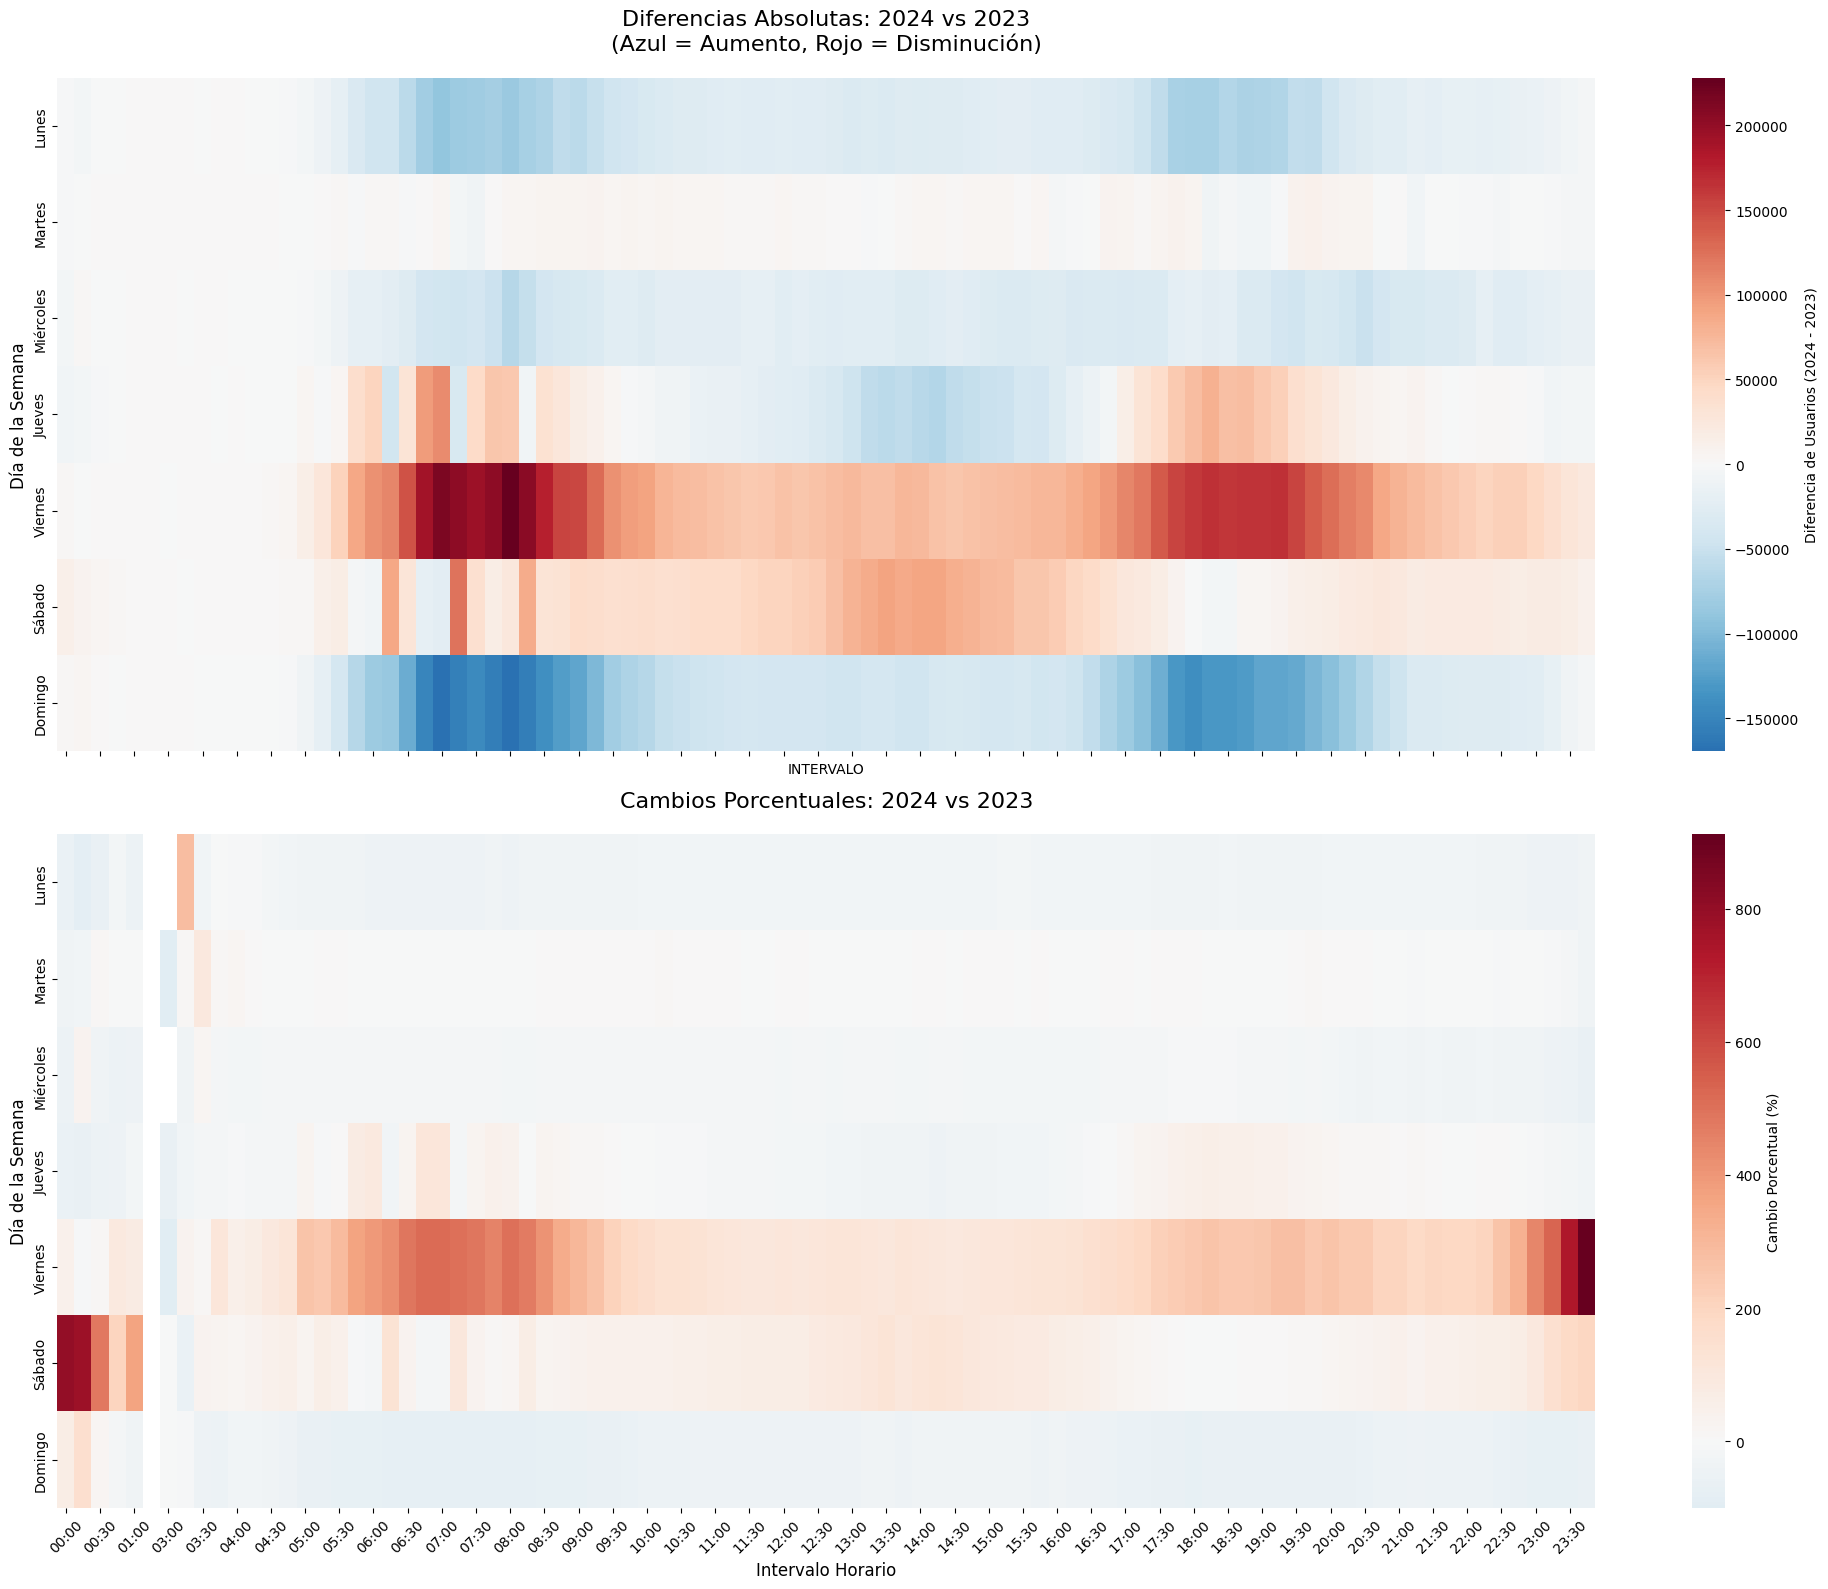

=== ESTADÍSTICAS GENERALES DE LA DIFERENCIA (2024 - 2023) ===
Diferencia total de usuarios: -0
Diferencia promedio por intervalo: -0.00
Mayor aumento en un intervalo: 228,159 usuarios
Mayor disminución en un intervalo: -169,436 usuarios

=== PUNTOS ESPECÍFICOS CON MAYORES CAMBIOS ===
📈 MAYOR AUMENTO: 228,159 usuarios
   ➤ Día: Viernes, Intervalo: 08:00
📉 MAYOR DISMINUCIÓN: -169,436 usuarios
   ➤ Día: Domingo, Intervalo: 08:00

=== TOP INTERVALOS CON MAYORES CAMBIOS ABSOLUTOS ===

Top 10 intervalos con mayor VARIACIÓN (cambios absolutos):
 1. 📉 07:15: 650,728 (neto: -0)
 2. ➡️ 07:00: 649,323 (neto: +0)
 3. ➡️ 08:00: 638,963 (neto: +0)
 4. ➡️ 08:15: 587,058 (neto: +0)
 5. ➡️ 06:45: 580,435 (neto: +0)
 6. 📉 07:45: 568,242 (neto: -0)
 7. ➡️ 07:30: 551,264 (neto: +0)
 8. ➡️ 08:30: 499,718 (neto: +0)
 9. ➡️ 18:15: 495,207 (neto: +0)
10. ➡️ 18:45: 478,473 (neto: +0)

Top 5 intervalos con mayor AUMENTO neto:

Top 5 intervalos con mayor DISMINUCIÓN neta:
1. 📉 07:15: -0 usuarios
2. 📉 07:45: -0 u

In [28]:
# === HEATMAP DIFERENCIA 2024-2023 MEJORADO ===

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === Definir el orden correcto de los días de la semana ===
dias_orden = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

# === Crear pivot tables para ambos años con orden correcto ===
pivot_2023 = df_2023_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)

pivot_2024 = df_2024_long.pivot_table(
    index='DiaSemana',
    columns='INTERVALO',
    values='TotalUsuarios',
    aggfunc='sum'
).reindex(dias_orden)

# === Calcular diferencias y porcentajes ===
pivot_diferencia = pivot_2024.subtract(pivot_2023, fill_value=0)
pivot_porcentaje = ((pivot_2024 - pivot_2023) / pivot_2023 * 100).replace([np.inf, -np.inf], 0)

# === VISUALIZACIÓN MEJORADA ===
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# HEATMAP 1: Diferencias absolutas
sns.heatmap(
    pivot_diferencia,
    cmap='RdBu_r',
    center=0,
    annot=False,
    fmt='.0f',
    cbar_kws={'label': 'Diferencia de Usuarios (2024 - 2023)'},
    ax=ax1
)
ax1.set_title('Diferencias Absolutas: 2024 vs 2023\n(Azul = Aumento, Rojo = Disminución)',
              fontsize=16, pad=20)
ax1.set_ylabel('Día de la Semana', fontsize=12)
ax1.tick_params(axis='x', labelbottom=False)  # Ocultar labels del eje x en el primer gráfico

# HEATMAP 2: Diferencias porcentuales
sns.heatmap(
    pivot_porcentaje,
    cmap='RdBu_r',
    center=0,
    annot=False,
    fmt='.1f',
    cbar_kws={'label': 'Cambio Porcentual (%)'},
    ax=ax2
)
ax2.set_title('Cambios Porcentuales: 2024 vs 2023', fontsize=16, pad=20)
ax2.set_ylabel('Día de la Semana', fontsize=12)
ax2.set_xlabel('Intervalo Horario', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# === ANÁLISIS ESTADÍSTICO MEJORADO ===
print("=== ESTADÍSTICAS GENERALES DE LA DIFERENCIA (2024 - 2023) ===")
diferencia_total = pivot_diferencia.sum().sum()
print(f"Diferencia total de usuarios: {diferencia_total:,.0f}")
print(f"Diferencia promedio por intervalo: {pivot_diferencia.mean().mean():,.2f}")
print(f"Mayor aumento en un intervalo: {pivot_diferencia.max().max():,.0f} usuarios")
print(f"Mayor disminución en un intervalo: {pivot_diferencia.min().min():,.0f} usuarios")

# === ENCONTRAR LOS PUNTOS EXACTOS DE MAYOR CAMBIO ===
print("\n=== PUNTOS ESPECÍFICOS CON MAYORES CAMBIOS ===")

# Encontrar máximo aumento
max_pos = pivot_diferencia.stack().idxmax()
max_val = pivot_diferencia.stack().max()
print(f"📈 MAYOR AUMENTO: {max_val:,.0f} usuarios")
print(f"   ➤ Día: {max_pos[0]}, Intervalo: {max_pos[1]}")

# Encontrar máxima disminución
min_pos = pivot_diferencia.stack().idxmin()
min_val = pivot_diferencia.stack().min()
print(f"📉 MAYOR DISMINUCIÓN: {min_val:,.0f} usuarios")
print(f"   ➤ Día: {min_pos[0]}, Intervalo: {min_pos[1]}")

# === ANÁLISIS POR INTERVALOS (valores absolutos para evitar cancelaciones) ===
print("\n=== TOP INTERVALOS CON MAYORES CAMBIOS ABSOLUTOS ===")

# Calcular cambios absolutos por intervalo
cambios_abs_intervalo = pivot_diferencia.abs().sum(axis=0).sort_values(ascending=False)
cambios_netos_intervalo = pivot_diferencia.sum(axis=0).sort_values(ascending=False)

print("\nTop 10 intervalos con mayor VARIACIÓN (cambios absolutos):")
for i, (intervalo, cambio_abs) in enumerate(cambios_abs_intervalo.head(10).items(), 1):
    cambio_neto = cambios_netos_intervalo[intervalo]
    tendencia = "📈" if cambio_neto > 0 else "📉" if cambio_neto < 0 else "➡️"
    print(f"{i:2}. {tendencia} {intervalo}: {cambio_abs:,.0f} (neto: {cambio_neto:+,.0f})")

print("\nTop 5 intervalos con mayor AUMENTO neto:")
for i, (intervalo, cambio) in enumerate(cambios_netos_intervalo.head().items(), 1):
    if cambio > 0:
        print(f"{i}. 📈 {intervalo}: {cambio:+,.0f} usuarios")

print("\nTop 5 intervalos con mayor DISMINUCIÓN neta:")
aumentos_ordenados = cambios_netos_intervalo.tail()[::-1]  # Invertir para mostrar las mayores disminuciones primero
for i, (intervalo, cambio) in enumerate(aumentos_ordenados.items(), 1):
    if cambio < 0:
        print(f"{i}. 📉 {intervalo}: {cambio:,.0f} usuarios")

# === ANÁLISIS POR DÍA DE LA SEMANA ===
print("\n=== CAMBIOS POR DÍA DE LA SEMANA ===")
cambios_por_dia = pivot_diferencia.sum(axis=1)
cambios_abs_por_dia = pivot_diferencia.abs().sum(axis=1)

for dia in dias_orden:
    cambio_neto = cambios_por_dia[dia]
    cambio_abs = cambios_abs_por_dia[dia]
    status = "📈" if cambio_neto > 0 else "📉" if cambio_neto < 0 else "➡️"
    print(f"{status} {dia:10}: {cambio_neto:+8,.0f} usuarios neto ({cambio_abs:8,.0f} variación total)")

# === ANÁLISIS DE HORARIOS PICO ===
print("\n=== ANÁLISIS DE HORARIOS ESPECÍFICOS ===")

# Definir horarios de interés
horarios_pico = {
    'Madrugada (04:00-06:59)': [f"{h:02d}:{m:02d}" for h in range(4, 7) for m in [0, 15, 30, 45]],
    'Pico Mañana (07:00-09:59)': [f"{h:02d}:{m:02d}" for h in range(7, 10) for m in [0, 15, 30, 45]],
    'Media Mañana (10:00-11:59)': [f"{h:02d}:{m:02d}" for h in range(10, 12) for m in [0, 15, 30, 45]],
    'Almuerzo (12:00-14:59)': [f"{h:02d}:{m:02d}" for h in range(12, 15) for m in [0, 15, 30, 45]],
    'Tarde (15:00-17:59)': [f"{h:02d}:{m:02d}" for h in range(15, 18) for m in [0, 15, 30, 45]],
    'Pico Tarde (18:00-20:59)': [f"{h:02d}:{m:02d}" for h in range(18, 21) for m in [0, 15, 30, 45]],
    'Noche (21:00-23:59)': [f"{h:02d}:{m:02d}" for h in range(21, 24) for m in [0, 15, 30, 45]]
}

for periodo, intervalos in horarios_pico.items():
    # Filtrar intervalos que existen en los datos
    intervalos_existentes = [i for i in intervalos if i in pivot_diferencia.columns]
    if intervalos_existentes:
        cambio_periodo = pivot_diferencia[intervalos_existentes].sum().sum()
        status = "📈" if cambio_periodo > 0 else "📉" if cambio_periodo < 0 else "➡️"
        print(f"{status} {periodo:25}: {cambio_periodo:+8,.0f} usuarios")

print("\n" + "="*80)
print("INTERPRETACIÓN:")
if diferencia_total > 0:
    print(f"✅ El sistema tuvo un AUMENTO neto de {diferencia_total:,.0f} usuarios en 2024 vs 2023")
elif diferencia_total < 0:
    print(f"📉 El sistema tuvo una DISMINUCIÓN neta de {abs(diferencia_total):,.0f} usuarios en 2024 vs 2023")
else:
    print("➡️ El sistema mantuvo prácticamente el mismo número de usuarios entre años")
print("="*80)